In [1]:
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import statsmodels as sm
import statsmodels.formula.api as smf

# upload csv file by using pd.read_csv fuction must import pandas as pd for this function 
mono_nucleotide_data = pd.read_csv("final_nucleotide_composition.csv")

# Removes the % under the proportion data set to make it an intger
mono_nucleotide_data['proportion'] = mono_nucleotide_data['proportion'].str.rstrip('%').astype('float')

# Prints out Data Table 
mono_nucleotide_data

,species,taxon,nucleotide_counted,count,proportion
0,Enteromyxum leei,Myxozoa,A,1531,18.11
1,Enteromyxum leei,Myxozoa,T,3630,42.93
2,Enteromyxum leei,Myxozoa,C,1329,15.72
3,Enteromyxum leei,Myxozoa,G,1966,23.25
4,Henneguya salminicola,Myxozoa,A,2038850,35.30
5,Henneguya salminicola,Myxozoa,T,1842474,31.90
6,Henneguya salminicola,Myxozoa,C,943750,16.34
7,Henneguya salminicola,Myxozoa,G,951219,16.47
8,Kudoa iwatai,Myxozoa,A,1858,24.51
9,Kudoa iwatai,Myxozoa,T,3532,46.59


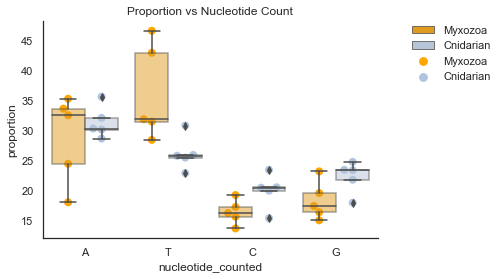

In [58]:
sns.set_context("talk")
sb.set_theme(style='white')
fig,ax = plt.subplots()

#Creates ViolinPlot & BoxPlot, Palette controls the colors of the data and hue creates the ledger 
sb.boxplot( x = 'nucleotide_counted',y = 'proportion', palette=['orange','lightsteelblue'], data = mono_nucleotide_data, hue = 'taxon' , boxprops={'alpha': .5}).set(title='Proportion vs Nucleotide Count')
sb.swarmplot( x = 'nucleotide_counted',y = 'proportion', palette=['orange','lightsteelblue'], data = mono_nucleotide_data, hue = 'taxon', dodge = True, zorder=.5, size=8 )

#Shift the ledger to the right
plt.legend(bbox_to_anchor=(1.35, 1), borderaxespad=0, frameon=False)

## Remove axis lines.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#Saves graph as a high resolution image on files
fig.savefig("Proportion_vs_Mono_Nucleotide_Count.png",dpi=300,bbox_inches="tight")

plt.show()

In [12]:
Thelohanellus_kitauei_dinucleotide_data = pd.read_csv("Thelohanellus_kitauei_dinucleotide_analysis.csv")
Thelohanellus_kitauei_dinucleotide_data.round({"CG_to_GC_Ratio":1})

Thelohanellus_kitauei_dinucleotide_data

,Unnamed: 0,Species,Unnamed: 2,Gene ID,CG Dinucleotide Content,GC Content,Index,CG_to_GC_Ratio
0,10377,Thelohanellus_kitauei,#VALUE!,lcl|JWZT01004076.1_cds_KII64896.1_10378 [locus...,0,98,1.0,0.000000
1,5342,Thelohanellus_kitauei,#VALUE!,lcl|JWZT01002262.1_cds_KII69877.1_5343 [locus_...,3,146,2.0,0.020548
2,14239,Thelohanellus_kitauei,#VALUE!,lcl|JWZT01005390.1_cds_KII60943.1_14240 [locus...,5,207,3.0,0.024155
3,11520,Thelohanellus_kitauei,#VALUE!,lcl|JWZT01004623.1_cds_KII63634.1_11521 [locus...,11,434,4.0,0.025346
4,7905,Thelohanellus_kitauei,#VALUE!,lcl|JWZT01003236.1_cds_KII67324.1_7906 [locus_...,5,164,5.0,0.030488
...,...,...,...,...,...,...,...,...
4351,2847,Thelohanellus_kitauei,#VALUE!,lcl|JWZT01001256.1_cds_KII72382.1_2848 [locus_...,68,351,NaN,0.193732
4352,8680,Thelohanellus_kitauei,#VALUE!,lcl|JWZT01003512.1_cds_KII66510.1_8681 [locus_...,53,268,NaN,0.197761
4353,7752,Thelohanellus_kitauei,#VALUE!,lcl|JWZT01003177.1_cds_KII67473.1_7753 [locus_...,43,217,NaN,0.198157
4354,14513,Thelohanellus_kitauei,#VALUE!,lcl|JWZT01005495.1_cds_KII60712.1_14514 [locus...,36,156,NaN,0.230769


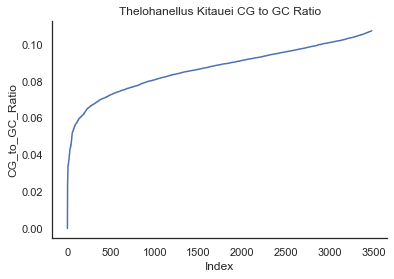

In [88]:
sns.set_context("talk")
sb.set_theme(style='white')
fig,ax = plt.subplots()

#Creates ViolinPlot & BoxPlot, Palette controls the colors of the data and hue creates the ledger 
sb.lineplot( x = 'Index',y = 'CG_to_GC_Ratio', palette=['orange','lightsteelblue'], data = Thelohanellus_kitauei_dinucleotide_data).set(title = 'Thelohanellus Kitauei CG to GC Ratio')



## Remove axis lines.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.savefig("Thelohanellus_kitauei_dinucleotide.png",dpi=300,bbox_inches="tight")

plt.show()

In [17]:
Enteromyxum_leei_dinucleotide_data = pd.read_csv("Enteromyxum_leei_dinucleotide_analysis.csv")
Enteromyxum_leei_dinucleotide_data.round({"CG_to_GC_Ratio":1})

Enteromyxum_leei_dinucleotide_data

,Unnamed: 0,Species,Unnamed: 2,Gene ID,CG Dinucleotide Content,GC Content,Index,CG_to_GC_Ratio
0,0,Enteromyxum_leei,#VALUE!,lcl|LN868201.1_cds_CRX66570.1_1 [gene=nad5] [p...,9,438,1,0.008197
1,1,Enteromyxum_leei,#VALUE!,lcl|LN868202.1_cds_CRX66571.1_2 [gene=cox1] [p...,17,547,2,0.016393
2,2,Enteromyxum_leei,#VALUE!,lcl|LN868203.1_cds_CRX66572.1_3 [protein_id=CR...,3,122,3,0.020548
3,3,Enteromyxum_leei,#VALUE!,lcl|LN868203.1_cds_CRX66573.1_4 [protein_id=CR...,1,61,4,0.024390
4,4,Enteromyxum_leei,#VALUE!,lcl|LN868203.1_cds_CRX66574.1_5 [protein_id=CR...,4,103,5,0.024590
5,5,Enteromyxum_leei,#VALUE!,lcl|LN868203.1_cds_CRX66575.1_6 [protein_id=CR...,1,122,6,0.025974
6,6,Enteromyxum_leei,#VALUE!,lcl|LN868204.1_cds_CRX66576.1_7 [protein_id=CR...,6,128,7,0.029412
7,7,Enteromyxum_leei,#VALUE!,lcl|LN868204.1_cds_CRX66577.1_8 [protein_id=CR...,10,297,8,0.030534
8,8,Enteromyxum_leei,#VALUE!,lcl|LN868205.1_cds_CRX66578.1_9 [gene=nad1] [p...,10,385,9,0.031079
9,9,Enteromyxum_leei,#VALUE!,lcl|LN868206.1_cds_CRX66579.1_10 [transl_excep...,8,262,10,0.033670


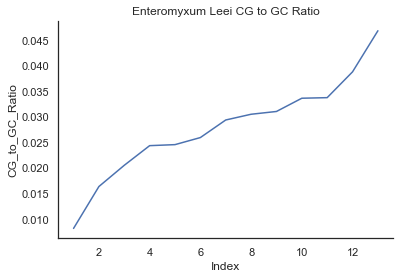

In [89]:
sns.set_context("talk")
sb.set_theme(style='white')
fig,ax = plt.subplots()

#Creates ViolinPlot & BoxPlot, Palette controls the colors of the data and hue creates the ledger 
sb.lineplot( x = 'Index',y = 'CG_to_GC_Ratio', palette=['orange','lightsteelblue'], data = Enteromyxum_leei_dinucleotide_data).set(title = 'Enteromyxum Leei CG to GC Ratio')



## Remove axis lines.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.savefig("Enteromyxum_leei_dinucleotide.png",dpi=300,bbox_inches="tight")

plt.show()

In [19]:
Henneguya_salminicola_dinucleotide_data = pd.read_csv("Henneguya_salminicola_dinucleotide_analysis.csv")
Henneguya_salminicola_dinucleotide_data.round({"CG_to_GC_Ratio":1})

Henneguya_salminicola_dinucleotide_data

,Unnamed: 0,Species,Unnamed: 2,Gene ID,CG Dinucleotide Content,GC Content,Index,CG_to_GC_Ratio
0,0,Henneguya_salminicola,69,lcl|SGJC01000001.1_cds_KAF0993424.1_1 [locus_t...,8,99,1,0.000000
1,1,Henneguya_salminicola,69,lcl|SGJC01000001.1_cds_KAF0993421.1_2 [locus_t...,14,117,2,0.000000
2,2,Henneguya_salminicola,69,lcl|SGJC01000001.1_cds_KAF0993420.1_3 [locus_t...,35,395,3,0.000000
3,3,Henneguya_salminicola,69,lcl|SGJC01000001.1_cds_KAF0993423.1_4 [locus_t...,21,214,4,0.000000
4,4,Henneguya_salminicola,69,lcl|SGJC01000001.1_cds_KAF0993426.1_5 [locus_t...,2,50,5,0.000000
...,...,...,...,...,...,...,...,...
8182,8182,Henneguya_salminicola,72,lcl|SGJC01018262.1_cds_KAF0985244.1_8183 [locu...,4,69,8183,0.189474
8183,8183,Henneguya_salminicola,72,lcl|SGJC01018294.1_cds_KAF0985243.1_8184 [locu...,12,149,8184,0.200000
8184,8184,Henneguya_salminicola,72,lcl|SGJC01018314.1_cds_KAF0985242.1_8185 [locu...,6,94,8185,0.200000
8185,8185,Henneguya_salminicola,72,lcl|SGJC01018318.1_cds_KAF0985241.1_8186 [locu...,10,115,8186,0.208955


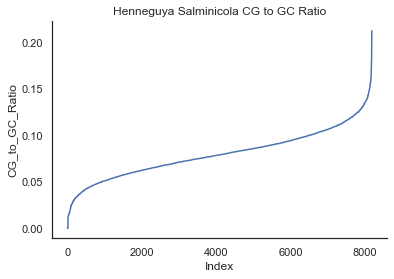

In [87]:
sns.set_context("talk")
sb.set_theme(style='white')
fig,ax = plt.subplots()

#Creates ViolinPlot & BoxPlot, Palette controls the colors of the data and hue creates the ledger 
sb.lineplot( x = 'Index',y = 'CG_to_GC_Ratio', palette=['orange','lightsteelblue'], data = Henneguya_salminicola_dinucleotide_data).set(title = 'Henneguya Salminicola CG to GC Ratio')



## Remove axis lines.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.savefig("Henneguya_salminicola_dinucleotide.png",dpi=300,bbox_inches="tight")


plt.show()

In [26]:
Myxobolus_squamalis_dinucleotide_data = pd.read_csv("Myxobolus_squamalis_dinucleotide_analysis.csv")
Myxobolus_squamalis_dinucleotide_data.round({"CG_to_GC_Ratio":1})

Myxobolus_squamalis_dinucleotide_data

,Unnamed: 0,Species,Unnamed: 2,Gene ID,CG Dinucleotide Content,GC Content,Index,CG_to_GC_Ratio
0,205,Myxobolus_squamalis,68,lcl|QWKW01000122.1_cds_KAF1745391.1_206 [locus...,108,1537,1,0.000000
1,551,Myxobolus_squamalis,68,lcl|QWKW01000383.1_cds_KAF1745045.1_552 [locus...,2,28,2,0.000000
2,8,Myxobolus_squamalis,69,lcl|QWKW01000005.1_cds_KAF1745588.1_9 [locus_t...,2,132,3,0.000000
3,28,Myxobolus_squamalis,69,lcl|QWKW01000021.1_cds_KAF1745568.1_29 [locus_...,1,61,4,0.000000
4,855,Myxobolus_squamalis,69,lcl|QWKW01000645.1_cds_KAF1744741.1_856 [locus...,17,535,5,0.000000
...,...,...,...,...,...,...,...,...
5718,4315,Myxobolus_squamalis,72,lcl|QWKW01009178.1_cds_KAF1741281.1_4316 [locu...,16,94,5719,0.170213
5719,3857,Myxobolus_squamalis,72,lcl|QWKW01006555.1_cds_KAF1741739.1_3858 [locu...,7,41,5720,0.170732
5720,5312,Myxobolus_squamalis,72,lcl|QWKW01023437.1_cds_KAF1740285.1_5313 [locu...,3,17,5721,0.176471
5721,2686,Myxobolus_squamalis,72,lcl|QWKW01003209.1_cds_KAF1742910.1_2687 [locu...,7,39,5722,0.179487


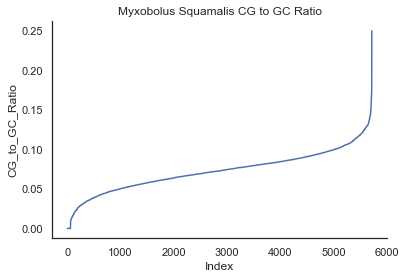

In [86]:
sns.set_context("talk")
sb.set_theme(style='white')
fig,ax = plt.subplots()

#Creates ViolinPlot & BoxPlot, Palette controls the colors of the data and hue creates the ledger 
sb.lineplot( x = 'Index',y = 'CG_to_GC_Ratio', palette=['orange','lightsteelblue'], data = Myxobolus_squamalis_dinucleotide_data).set(title = 'Myxobolus Squamalis CG to GC Ratio')



## Remove axis lines.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.savefig("Myxobolus_squamalis_dinucleotide.png",dpi=300,bbox_inches="tight")

plt.show()

In [28]:
Kudoa_iwata_dinucleotide_data = pd.read_csv("Kudoa_iwata_dinucleotide_analysis.csv")
Kudoa_iwata_dinucleotide_data.round({"CG_to_GC_Ratio":1})

Kudoa_iwata_dinucleotide_data

,Unnamed: 0,Species,Unnamed: 2,Gene ID,CG Content,GC Content,index,CG_to_GC_Ratio
0,1,Kudoa_iwata,#VALUE!,lcl|LT671462.1_cds_SHO28748.1_2 [protein_id=SH...,0,94,1,0.000000
1,3,Kudoa_iwata,#VALUE!,lcl|LT671462.1_cds_SHO28750.1_4 [gene=cob] [pr...,0,318,2,0.000000
2,7,Kudoa_iwata,#VALUE!,lcl|LT671462.1_cds_SHO28754.1_8 [gene=cox2] [p...,0,182,3,0.000000
3,8,Kudoa_iwata,#VALUE!,lcl|LT671462.1_cds_SHO28755.1_9 [protein_id=SH...,0,86,4,0.000000
4,9,Kudoa_iwata,#VALUE!,lcl|LT671462.1_cds_SHO28756.1_10 [protein_id=S...,0,110,5,0.000000
5,6,Kudoa_iwata,#VALUE!,lcl|LT671462.1_cds_SHO28753.1_7 [gene=nad5] [p...,1,270,6,0.003704
6,0,Kudoa_iwata,#VALUE!,lcl|LT671462.1_cds_SHO28747.1_1 [gene=cox1] [p...,3,485,7,0.006186
7,2,Kudoa_iwata,#VALUE!,lcl|LT671462.1_cds_SHO33068.1_3 [protein_id=SH...,2,259,8,0.007722
8,5,Kudoa_iwata,#VALUE!,lcl|LT671462.1_cds_SHO28752.1_6 [protein_id=SH...,2,174,9,0.011494
9,4,Kudoa_iwata,#VALUE!,lcl|LT671462.1_cds_SHO28751.1_5 [gene=nad1] [p...,3,213,10,0.014085


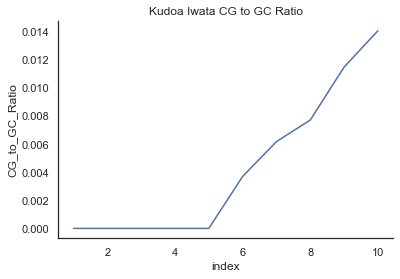

In [85]:
sns.set_context("talk")
sb.set_theme(style='white')
fig,ax = plt.subplots()

#Creates ViolinPlot & BoxPlot, Palette controls the colors of the data and hue creates the ledger 
sb.lineplot( x = 'index',y = 'CG_to_GC_Ratio', palette=['orange','lightsteelblue'], data = Kudoa_iwata_dinucleotide_data).set(title = 'Kudoa Iwata CG to GC Ratio')




## Remove axis lines.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.savefig("Kudoa_iwata_dinucleotide.png",dpi=300,bbox_inches="tight")

plt.show()

In [31]:
Acropora_digitifera_dinucleotide_data = pd.read_csv("Acropora_digitifera_dinucleotide_analysis.csv")
Acropora_digitifera_dinucleotide_data.round({"CG_to_GC_Ratio":1})

Acropora_digitifera_dinucleotide_data

,Unnamed: 0,Species,Unnamed: 2,Gene ID,CG Dinucleotide Content,GC Content,Index,CG_to_GC_Ratio
0,543,Acropora_digitifera,#VALUE!,lcl|NW_015441059.1_cds_XP_015752646.1_544 [gen...,0,129,1,0.000000
1,616,Acropora_digitifera,#VALUE!,lcl|NW_015441059.1_cds_XP_015752784.1_617 [gen...,0,108,2,0.000000
2,1985,Acropora_digitifera,#VALUE!,lcl|NW_015441068.1_cds_XP_015768257.1_1986 [ge...,0,122,3,0.000000
3,2051,Acropora_digitifera,#VALUE!,lcl|NW_015441068.1_cds_XP_015769989.1_2052 [ge...,0,124,4,0.000000
4,7252,Acropora_digitifera,#VALUE!,lcl|NW_015441119.1_cds_XP_015755180.1_7253 [ge...,0,139,5,0.000000
...,...,...,...,...,...,...,...,...
33873,10279,Acropora_digitifera,#VALUE!,lcl|NW_015441162.1_cds_XP_015758562.1_10280 [g...,43,214,33874,0.200935
33874,2333,Acropora_digitifera,#VALUE!,lcl|NW_015441070.1_cds_XP_015772277.1_2334 [ge...,38,180,33875,0.211111
33875,14889,Acropora_digitifera,#VALUE!,lcl|NW_015441245.1_cds_XP_015763672.1_14890 [g...,71,292,33876,0.243151
33876,29596,Acropora_digitifera,#VALUE!,lcl|NW_015441848.1_cds_XP_015780046.1_29597 [g...,28,98,33877,0.285714


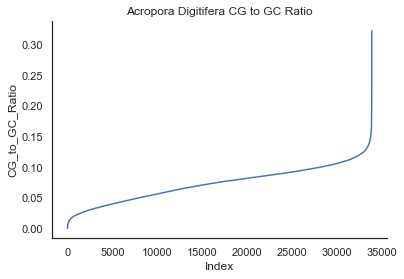

In [84]:
sns.set_context("talk")
sb.set_theme(style='white')
fig,ax = plt.subplots()

#Creates ViolinPlot & BoxPlot, Palette controls the colors of the data and hue creates the ledger 
sb.lineplot( x = 'Index',y = 'CG_to_GC_Ratio', palette=['orange'], data = Acropora_digitifera_dinucleotide_data).set(title = 'Acropora Digitifera CG to GC Ratio')



## Remove axis lines.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.savefig("Acropora_digitifera_dinucleotide.png",dpi=300,bbox_inches="tight")

plt.show()

In [34]:
Pocillopora_damicornis_dinucleotide_data = pd.read_csv("Pocillopora_damicornis_dinucleotide_analysis.csv")
Pocillopora_damicornis_dinucleotide_data.round({"CG_to_GC_Ratio":1})

Pocillopora_damicornis_dinucleotide_data

,Unnamed: 0,Species,Unnamed: 2,Gene ID,CG Dinucleotide Content,GC Content,index,CG_to_GC_Ratio
0,1536,Pocillopora_damicornis,#VALUE!,lcl|NW_020843646.1_cds_XP_027049352.1_1537 [ge...,0,222,1,0.000000
1,3319,Pocillopora_damicornis,#VALUE!,lcl|NW_020843958.1_cds_XP_027035692.1_3320 [ge...,0,119,2,0.000000
2,3825,Pocillopora_damicornis,#VALUE!,lcl|NW_020844078.1_cds_XP_027036248.1_3826 [ge...,0,104,3,0.000000
3,5145,Pocillopora_damicornis,#VALUE!,lcl|NW_020844297.1_cds_XP_027037728.1_5146 [ge...,0,212,4,0.000000
4,8169,Pocillopora_damicornis,#VALUE!,lcl|NW_020844818.1_cds_XP_027041052.1_8170 [ge...,0,138,5,0.000000
...,...,...,...,...,...,...,...,...
25178,11157,Pocillopora_damicornis,#VALUE!,lcl|NW_020845377.1_cds_XP_027044375.1_11158 [g...,48,265,25179,0.181132
25179,11054,Pocillopora_damicornis,#VALUE!,lcl|NW_020845351.1_cds_XP_027044323.1_11055 [g...,22,120,25180,0.183333
25180,4615,Pocillopora_damicornis,#VALUE!,lcl|NW_020844198.1_cds_XP_027037123.1_4616 [ge...,225,1186,25181,0.189713
25181,12619,Pocillopora_damicornis,#VALUE!,lcl|NW_020845585.1_cds_XP_027046005.1_12620 [g...,64,329,25182,0.194529


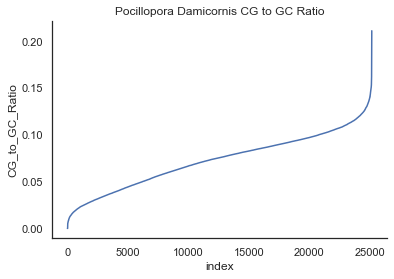

In [83]:
sns.set_context("talk")
sb.set_theme(style='white')
fig,ax = plt.subplots()

#Creates ViolinPlot & BoxPlot, Palette controls the colors of the data and hue creates the ledger 
sb.lineplot( x = 'index',y = 'CG_to_GC_Ratio', palette=['orange','lightsteelblue'], data = Pocillopora_damicornis_dinucleotide_data).set(title = 'Pocillopora Damicornis CG to GC Ratio')




## Remove axis lines.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.savefig("Pocillopora_damicornis_dinucleotide.png",dpi=300,bbox_inches="tight")

plt.show()

In [41]:
Nematostella_vectensis_dinucleotide_data = pd.read_csv("Nematostella_vectensis_dinucleotide_analysis.csv")
Nematostella_vectensis_dinucleotide_data.round({"CG_to_GC_Ratio":1})

Nematostella_vectensis_dinucleotide_data

,Unnamed: 0,Species,Unnamed: 2,Gene ID,CG Dinucleotide Content,GC Content,Index,CG_to_GC_Ratio
0,0,Nematostella_vectensis,#VALUE!,lcl|NC_064034.1_cds_XP_048580524.1_1 [gene=LOC...,655,6355,1,0.000000
1,1,Nematostella_vectensis,#VALUE!,lcl|NC_064034.1_cds_XP_048580530.1_2 [gene=LOC...,655,6355,2,0.000000
2,2,Nematostella_vectensis,#VALUE!,lcl|NC_064034.1_cds_XP_048580535.1_3 [gene=LOC...,655,6347,3,0.000000
3,3,Nematostella_vectensis,#VALUE!,lcl|NC_064034.1_cds_XP_032230053.2_4 [gene=LOC...,655,6357,4,0.000000
4,4,Nematostella_vectensis,#VALUE!,lcl|NC_064034.1_cds_XP_048580518.1_5 [gene=LOC...,655,6357,5,0.000000
...,...,...,...,...,...,...,...,...
32365,32365,Nematostella_vectensis,#VALUE!,lcl|NW_026019279.1_cds_XP_048579159.1_32366 [g...,82,774,32366,0.209567
32366,32366,Nematostella_vectensis,#VALUE!,lcl|NW_026019282.1_cds_XP_048579163.1_32367 [g...,101,650,32367,0.216110
32367,32367,Nematostella_vectensis,#VALUE!,lcl|NW_026019282.1_cds_XP_048579161.1_32368 [g...,102,657,32368,0.222513
32368,32368,Nematostella_vectensis,#VALUE!,lcl|NW_026019282.1_cds_XP_048579162.1_32369 [g...,102,657,32369,0.231481


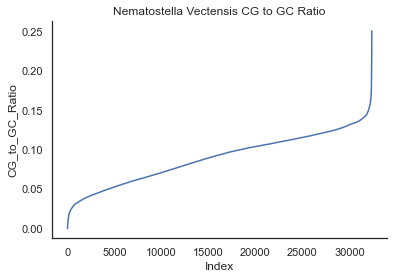

In [82]:
sns.set_context("talk")
sb.set_theme(style='white')
fig,ax = plt.subplots()

#Creates ViolinPlot & BoxPlot, Palette controls the colors of the data and hue creates the ledger 
sb.lineplot( x = 'Index',y = 'CG_to_GC_Ratio', palette=['orange','lightsteelblue'], data = Nematostella_vectensis_dinucleotide_data).set(title = 'Nematostella Vectensis CG to GC Ratio')



## Remove axis lines.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.savefig("Nematostella_vectensis_dinucleotide.png",dpi=300,bbox_inches="tight")

plt.show()

In [43]:
Exaiptasia_diaphana_dinucleotide_data = pd.read_csv("Exaiptasia_diaphana_dinucleotide_analysis.csv")
Exaiptasia_diaphana_dinucleotide_data.round({"CG_to_GC_Ratio":1})

Exaiptasia_diaphana_dinucleotide_data

,Unnamed: 0,Species,Unnamed: 2,Gene ID,CG Dinucleotide Content,GC Content,Index,CG_to_GC_Ratio
0,257,Exaiptasia_diaphana,#VALUE!,lcl|NW_018384102.1_cds_XP_028517869.1_258 [gen...,0,109,1,0.000000
1,902,Exaiptasia_diaphana,#VALUE!,lcl|NW_018384181.1_cds_XP_020897611.1_903 [gen...,0,89,2,0.000000
2,1673,Exaiptasia_diaphana,#VALUE!,lcl|NW_018384256.1_cds_XP_020905342.1_1674 [ge...,0,97,3,0.000000
3,1877,Exaiptasia_diaphana,#VALUE!,lcl|NW_018384289.1_cds_XP_020907434.1_1878 [ge...,0,39,4,0.000000
4,2433,Exaiptasia_diaphana,#VALUE!,lcl|NW_018384354.1_cds_XP_020913527.2_2434 [ge...,0,139,5,0.000000
...,...,...,...,...,...,...,...,...
27748,19893,Exaiptasia_diaphana,#VALUE!,lcl|NW_018387547.1_cds_XP_028517259.1_19894 [g...,48,238,27749,0.201681
27749,11495,Exaiptasia_diaphana,#VALUE!,lcl|NW_018385529.1_cds_XP_020900121.1_11496 [g...,52,257,27750,0.202335
27750,18939,Exaiptasia_diaphana,#VALUE!,lcl|NW_018387208.1_cds_XP_028516940.1_18940 [g...,62,302,27751,0.205298
27751,5573,Exaiptasia_diaphana,#VALUE!,lcl|NW_018384750.1_cds_XP_028513098.1_5574 [ge...,579,2809,27752,0.206123


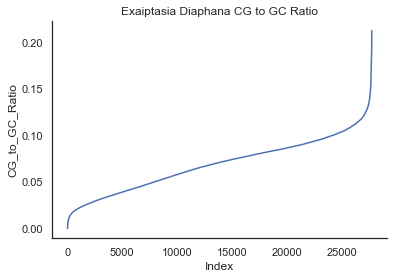

In [80]:
sns.set_context("talk")
sb.set_theme(style='white')
fig,ax = plt.subplots()

#Creates ViolinPlot & BoxPlot, Palette controls the colors of the data and hue creates the ledger 
sb.lineplot( x = 'Index',y = 'CG_to_GC_Ratio', palette=['orange','lightsteelblue'], data = Exaiptasia_diaphana_dinucleotide_data).set(title = 'Exaiptasia Diaphana CG to GC Ratio')




## Remove axis lines.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.savefig("Exaiptasia_diaphana_dinucleotide.png",dpi=300,bbox_inches="tight")


plt.show()

In [45]:
Hydra_vulgaris_dinucleotide_data = pd.read_csv("Hydra_vulgaris_dinucleotide_analysis.csv")
Hydra_vulgaris_dinucleotide_data.round({"CG_to_GC_Ratio":1})

Hydra_vulgaris_dinucleotide_data

,Unnamed: 0,Species,Unnamed: 2,Gene ID,CG Dinucleotide Content,GC Content,Index,CG_to_GC_Ratio
0,0,Hydra_vulgaris,#VALUE!,lcl|NC_061156.1_cds_XP_047132677.1_1 [gene=LOC...,9,203,1,0.000000
1,1,Hydra_vulgaris,#VALUE!,lcl|NC_061156.1_cds_XP_047131986.1_2 [gene=LOC...,12,218,2,0.000000
2,2,Hydra_vulgaris,#VALUE!,lcl|NC_061156.1_cds_XP_047134143.1_3 [gene=LOC...,5,115,3,0.000000
3,3,Hydra_vulgaris,#VALUE!,lcl|NC_061156.1_cds_XP_047134647.1_4 [gene=LOC...,5,115,4,0.000000
4,4,Hydra_vulgaris,#VALUE!,lcl|NC_061156.1_cds_XP_047135815.1_5 [gene=LOC...,0,164,5,0.000000
...,...,...,...,...,...,...,...,...
32698,32698,Hydra_vulgaris,#VALUE!,lcl|NC_011221.1_cds_YP_002221534.1_32699 [gene...,0,57,32699,0.166667
32699,32699,Hydra_vulgaris,#VALUE!,lcl|NC_011221.1_cds_YP_002221535.1_32700 [gene...,2,226,32700,0.166667
32700,32700,Hydra_vulgaris,#VALUE!,lcl|NC_011221.1_cds_YP_002221536.1_32701 [gene...,5,302,32701,0.168317
32701,32701,Hydra_vulgaris,#VALUE!,lcl|NC_011221.1_cds_YP_002221537.1_32702 [gene...,9,281,32702,0.168317


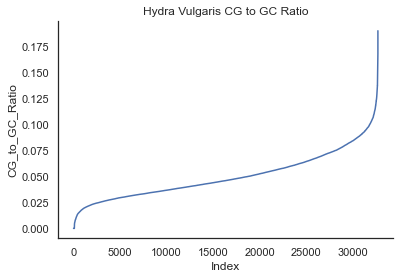

In [79]:
sns.set_context("talk")
sb.set_theme(style='white')
fig,ax = plt.subplots()

#Creates ViolinPlot & BoxPlot, Palette controls the colors of the data and hue creates the ledger 
sb.lineplot( x = 'Index',y = 'CG_to_GC_Ratio', palette=['orange','lightsteelblue'], data = Hydra_vulgaris_dinucleotide_data).set(title = 'Hydra Vulgaris CG to GC Ratio')



## Remove axis lines.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.savefig("Hydra_vulgaris_dinucleotide.png",dpi=300,bbox_inches="tight")

plt.show()

In [61]:
Average_CG_to_GC_Ratio_data = pd.read_csv("Average_CG_to_GC_Ratio.csv")

Average_CG_to_GC_Ratio_data

,Species,Taxon,CG_Dinucleotide_Count_Average,GC_Dinucleotide_Count_Average,GC_Content_Average,Index,Average_CG_to_GC_Ratio
0,Enteromyxum leei,Myxozoa,7.076923,16.153846,253.461538,1,0.571962
1,Henneguya salminicola,Myxozoa,18.613900,20.388543,231.460730,2,0.976837
2,Kudoa iwatai,Myxozoa,1.100000,7.700000,219.100000,3,0.215150
3,Myxobolus squamalis,Myxozoa,17.203215,21.712039,229.942862,4,0.829062
4,Thelohanellus kitauei,Myxozoa,26.173968,25.179827,280.314248,5,1.121915
5,Acropora digitifera,Cnidarian,45.999528,67.474143,613.822274,6,0.676795
6,Pocillopora damicornis,Cnidarian,52.765000,75.659135,716.497915,7,0.693909
7,Nematostella vectensis,Cnidarian,96.216620,121.468767,1027.624220,8,0.778465
8,Exaiptasia diaphana,Cnidarian,46.520628,66.943538,666.071091,9,0.689656
9,Hydra vulgaris,Cnidarian,27.349754,55.050209,584.100816,10,0.544498


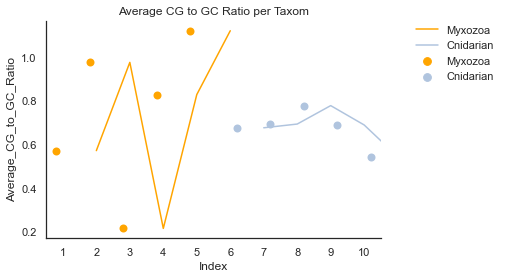

In [65]:
sns.set_context("talk")
sb.set_theme(style='white')
fig,ax = plt.subplots()

#Creates ViolinPlot & BoxPlot, Palette controls the colors of the data and hue creates the ledger 
sb.lineplot( x = 'Index',y = 'Average_CG_to_GC_Ratio', palette=['orange','lightsteelblue'], data = Average_CG_to_GC_Ratio_data, hue = 'Taxon').set(title='Average CG to GC Ratio per Taxom')
sb.swarmplot( x = 'Index',y = 'Average_CG_to_GC_Ratio', palette=['orange','lightsteelblue'], data = Average_CG_to_GC_Ratio_data, hue = 'Taxon', dodge = True, zorder=.5, size=8 )


#Shift the ledger to the right
plt.legend(bbox_to_anchor=(1.35, 1), borderaxespad=0, frameon=False)

## Remove axis lines.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.savefig("Average_CG_to_GC_Ratio.png",dpi=300,bbox_inches="tight")

plt.show()

In [56]:
model = smf.ols(formula = 'Average_CG_to_GC_Ratio ~ Taxon', data = Average_CG_to_GC_Ratio_data)
results = model.fit()
summary = results.summary()
print(summary)

                              OLS Regression Results                              
Dep. Variable:     Average_CG_to_GC_Ratio   R-squared:                       0.020
Model:                                OLS   Adj. R-squared:                 -0.103
Method:                     Least Squares   F-statistic:                    0.1624
Date:                    Thu, 16 Mar 2023   Prob (F-statistic):              0.698
Time:                            20:49:22   Log-Likelihood:                0.38746
No. Observations:                      10   AIC:                             3.225
Df Residuals:                           8   BIC:                             3.830
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------


/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [63]:
rows_with_A = mono_nucleotide_data['nucleotide_counted'] == 'A'
nucleotide_A_data = mono_nucleotide_data[rows_with_A]

nucleotide_A_data

,species,taxon,nucleotide_counted,count,proportion
0,Enteromyxum leei,Myxozoa,A,1531,18.11
4,Henneguya salminicola,Myxozoa,A,2038850,35.30
8,Kudoa iwatai,Myxozoa,A,1858,24.51
12,Myxobolus squamalis,Myxozoa,A,1271670,33.66
16,Thelohanellus kitauei,Myxozoa,A,3517955,32.56
20,Acropora digitifera,Cnidarian,A,14274726,30.19
24,Pocillopora damicornis,Cnidarian,A,12421575,30.36
28,Nematostella vectensis\n,Cnidarian,A,19752247,28.70
32,Exaiptasia diaphana\n,Cnidarian,A,14171337,32.12
36,Hydra vulgaris,Cnidarian,A,20304119,35.63


In [64]:
import statsmodels as sm
import statsmodels.formula.api as smf

nucleotides = ['A','T','C','G']
for nucleotide in nucleotides:
    rows_with_A = mono_nucleotide_data['nucleotide_counted'] == nucleotide
    nucleotide_A_data = mono_nucleotide_data[rows_with_A]
    print(f'analyzing nucleotide composition {nucleotide}')
    
    nucleotide_A_data
    model = smf.ols(formula='proportion ~ taxon', data=nucleotide_A_data)
    results = model.fit()
    summary = results.summary()
    print(summary)
    output_file = open(f"nucleotide_{nucleotide}_Stats_Results.txt", "w")
    output_file.write(str(summary))
    output_file.close()

analyzing nucleotide composition A
                            OLS Regression Results                            
Dep. Variable:             proportion   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                 -0.053
Method:                 Least Squares   F-statistic:                    0.5491
Date:                Thu, 16 Mar 2023   Prob (F-statistic):              0.480
Time:                        20:51:10   Log-Likelihood:                -30.099
No. Observations:                  10   AIC:                             64.20
Df Residuals:                       8   BIC:                             64.80
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Inter

/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [52]:
nucleotide_data = pd.read_csv("final_nucleotide_composition.csv")
nucleotide_data['proportion'] = nucleotide_data['proportion'].str.rstrip('%').astype('float')
mono_contigency_table = pd.crosstab(nucleotide_data['taxon'], nucleotide_data['nucleotide_counted'], nucleotide_data['count'], aggfunc=sum)

mono_contigency_table

nucleotide_counted,A,C,G,T
taxon,,,,
Cnidarian,80924004,51978795,57711359,67498278
Myxozoa,6831864,3688862,3737876,6116488


In [50]:
stat, p, dof, expected = chi2_contingency(mono_contigency_table)
prob = .95
chi = chi2.ppf(prob, dof)


if abs(stat) >= chi:
    print('reject Ho')
else:
    print('fail to reject Ho')


print("pvalue",p)
print("stat",stat)
print("dof",dof)


reject Ho
pvalue 0.0
stat 312288.14159274515
dof 3


In [49]:
Dinucleotide_data = pd.read_csv("Dinucleotide_composition.csv")
Dinucleotide_data['proportion'] = Dinucleotide_data['proportion'].str.rstrip('%').astype('float')

Dinucleotide_data

,species,taxon,Dinucleotide_counted,count,proportion
0,Enteromyxum leei,Myxozoa,CG,92,1.09
1,Enteromyxum leei,Myxozoa,GC,210,2.99
2,Henneguya salminicola,Myxozoa,CG,152392,2.64
3,Henneguya salminicola,Myxozoa,GC,166940,2.89
4,Kudoa iwatai,Myxozoa,CG,11,0.15
5,Kudoa iwatai,Myxozoa,GC,77,1.02
6,Myxobolus squamalis,Myxozoa,CG,98466,2.61
7,Myxobolus squamalis,Myxozoa,GC,124283,3.29
8,Thelohanellus kitauei,Myxozoa,CG,393133,3.64
9,Thelohanellus kitauei,Myxozoa,GC,378201,3.50


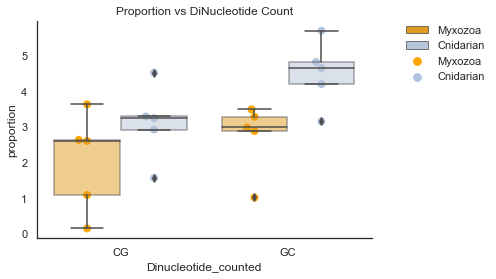

In [48]:
# Style changes the background of the graph. Set the parameters that control the scaling of plot elements
sb.set_context("talk")
sb.set_theme(style='white')
fig,ax = plt.subplots()

#Creates ViolinPlot & BoxPlot, Palette controls the colors of the data and hue creates the ledger 
sb.boxplot( x = 'Dinucleotide_counted',y = 'proportion', palette=['orange','lightsteelblue'], data = Dinucleotide_data, hue = 'taxon' , boxprops={'alpha': .5}).set(title='Proportion vs DiNucleotide Count')
sb.swarmplot( x = 'Dinucleotide_counted',y = 'proportion', palette=['orange','lightsteelblue'], data = Dinucleotide_data, hue = 'taxon', dodge = True, zorder=.5, size=8 )

#Shift the ledger to the right
plt.legend(bbox_to_anchor=(1.35, 1), borderaxespad=0, frameon=False)

## Remove axis lines.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.savefig("Proportion_vs_DiNucleotide_Counted_Box_Plot.png",dpi=300,bbox_inches="tight")
plt.show()

In [45]:
rows_with_GC = Dinucleotide_data['Dinucleotide_counted'] == 'GC'
Dinucleotide_GC_data = Dinucleotide_data[rows_with_GC]

Dinucleotide_GC_data

,species,taxon,Dinucleotide_counted,count,proportion
1,Enteromyxum leei,Myxozoa,GC,210,2.99
3,Henneguya salminicola,Myxozoa,GC,166940,2.89
5,Kudoa iwatai,Myxozoa,GC,77,1.02
7,Myxobolus squamalis,Myxozoa,GC,124283,3.29
9,Thelohanellus kitauei,Myxozoa,GC,378201,3.50
11,Acropora digitifera,Cnidarian,GC,2285919,4.83
13,Pocillopora damicornis,Cnidarian,GC,1905375,4.66
15,Nematostella vectensis\n,Cnidarian,GC,3931953,5.71
17,Exaiptasia diaphana\n,Cnidarian,GC,1857918,4.21
19,Hydra vulgaris,Cnidarian,GC,1800312,3.16


In [44]:
Dinucleotides = ['GC','CG']
for Dinucleotide in Dinucleotides:
    rows_with_GC = Dinucleotide_data['Dinucleotide_counted'] == Dinucleotide
    Dinucleotide_GC_data = Dinucleotide_data[rows_with_GC]
    print(f'analyzing nucleotide composition {Dinucleotide}')
    
    Dinucleotide_GC_data
    model = smf.ols(formula='proportion ~ taxon', data=Dinucleotide_GC_data)
    results = model.fit()
    summary = results.summary()
    print(summary)
    output_file = open(f"Dinucleotide_{Dinucleotide}_Stats_Results.txt", "w")
    output_file.write(str(summary))
    output_file.close()

analyzing nucleotide composition GC
                            OLS Regression Results                            
Dep. Variable:             proportion   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     8.524
Date:                Thu, 16 Mar 2023   Prob (F-statistic):             0.0193
Time:                        20:46:58   Log-Likelihood:                -12.684
No. Observations:                  10   AIC:                             29.37
Df Residuals:                       8   BIC:                             29.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Inte

/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [42]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [43]:
Dinucleotide_data = pd.read_csv("Dinucleotide_composition.csv")
Dinucleotide_data['proportion'] = Dinucleotide_data['proportion'].str.rstrip('%').astype('float')
contigency_table = pd.crosstab(Dinucleotide_data['taxon'], Dinucleotide_data['Dinucleotide_counted'], Dinucleotide_data['count'], aggfunc=sum)

contigency_table

Dinucleotide_counted,CG,GC
taxon,,
Cnidarian,8187195,11781477
Myxozoa,644094,669711


In [37]:
stat, p, dof, expected = chi2_contingency(contigency_table)
prob = .95
chi = chi2.ppf(prob, dof)


if abs(stat) >= chi:
    print('reject Ho')
else:
    print('fail to reject Ho')

print("pvalue",p)
print("stat",stat)
print("dof",dof)


reject Ho
pvalue 0.0
stat 32699.47073428636
dof 1
